In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Let's clean the data
df = pd.read_csv('CNN_2023.csv')
df.head()

,date,content,link
0,2023-01-31,ATP says no disciplinary action to be taken ag...,https://edition.cnn.com/2023/01/31/tennis/atp-...
1,2023-01-31,"Insults, tee throwing and lawsuits: Rory McIlr...",https://edition.cnn.com/2023/01/31/golf/rory-m...
2,2023-01-31,Novak Djokovic could win another 'four or five...,https://edition.cnn.com/2023/01/31/tennis/nova...
3,2023-01-31,Former Wagner commander describes brutality an...,https://edition.cnn.com/2023/01/30/europe/wagn...
4,2023-01-31,Why the Super Bowl is 'a big moment for a lot ...,https://edition.cnn.com/2023/01/31/sport/super...


In [73]:
#Date into datetime
format = '%Y-%m-%d'
df['date'] = pd.to_datetime(df['date'], format=format)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3340 non-null   datetime64[ns]
 1   content  3340 non-null   object        
 2   link     3340 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ KB


In [74]:
#Separate the date into day and month, drop date column
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df = df.drop('date', axis=1)
df.head()

,content,link,day,month
0,ATP says no disciplinary action to be taken ag...,https://edition.cnn.com/2023/01/31/tennis/atp-...,31,1
1,"Insults, tee throwing and lawsuits: Rory McIlr...",https://edition.cnn.com/2023/01/31/golf/rory-m...,31,1
2,Novak Djokovic could win another 'four or five...,https://edition.cnn.com/2023/01/31/tennis/nova...,31,1
3,Former Wagner commander describes brutality an...,https://edition.cnn.com/2023/01/30/europe/wagn...,31,1
4,Why the Super Bowl is 'a big moment for a lot ...,https://edition.cnn.com/2023/01/31/sport/super...,31,1


In [75]:
#get a value from link 
df['link'] = df['link'].str.split('/').str[6]



In [76]:
df.head()

,content,link,day,month
0,ATP says no disciplinary action to be taken ag...,tennis,31,1
1,"Insults, tee throwing and lawsuits: Rory McIlr...",golf,31,1
2,Novak Djokovic could win another 'four or five...,tennis,31,1
3,Former Wagner commander describes brutality an...,europe,31,1
4,Why the Super Bowl is 'a big moment for a lot ...,sport,31,1


In [77]:
#rename column link to category
df.rename(columns={'link':'category'}, inplace=True)


In [78]:
# Count unique categories in category 
df['category'].value_counts()


category
europe        1029
sport          852
football       504
index.html     305
tennis         176
uk             163
golf           124
australia       91
world           42
motorsport      42
us               9
business         1
politics         1
asia             1
Name: count, dtype: int64

In [81]:
#Clean the category column
#remove index.html, us, business, politics and asia 
df = df[df.category != 'index.html']
df = df[df.category != 'us']
df = df[df.category != 'business']
df = df[df.category != 'politics']



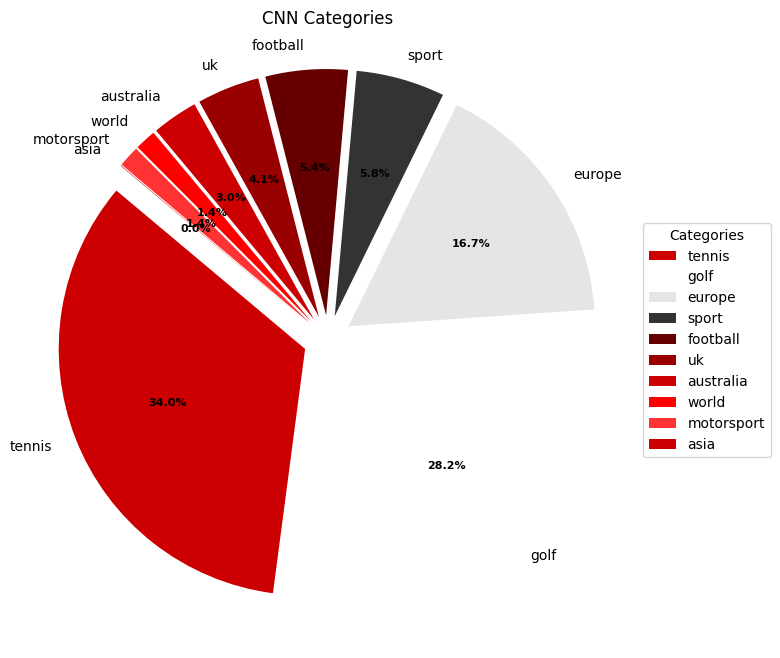

In [104]:
#colors
colors = ['#CC0000', '#FFFFFF', '#E5E5E5', '#333333', '#660000', '#990000', '#CC0000', '#FF0000', '#FF3333']

# Define the categories
categories = df['category'].unique()

# Count the occurrences of each category
category_counts = df['category'].value_counts()

# Create a pie chart of the categories
fig, ax = plt.subplots(figsize=(8, 8))  # Increase the figure size
explode = [0.1]*len(categories)  # Explode all slices
wedges, texts, autotexts = ax.pie(category_counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)

# Draw a legend
ax.legend(wedges, categories, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")  # Increase the font size and weight for percentages

ax.set_title('CNN Categories')  # Set the title

plt.show()


In [89]:
from collections import Counter

# Filter the dataframe for the 'europe' category and split the content into words
words = df[df['category'] == 'europe']['content'].str.split().explode()

# Count the occurrences of each word
word_counts = Counter(words)

# List of words to remove
remove = ['the', 'to', 'of', 'a', 'and', 'in', 'on', 'for', 'that', 'says', 'is', 'at', 'with', 'from', 'it', 'as', 'an', 'by', 'has', 'have', 'was', 'were', 'will', 'be', 'this', 'are', 'who', 'not', 'but', 'said', 'he', 'she', 'they', 'their', 'his', 'her', 'its', 'or', 'about', 'after', 'been', 'more', 'than', 'also', 'up', 'down', 'over', 'into', 'out', 'could', 'would', 'should', 'there', 'when', 'what', 'where', 'how', 'why', 'if', 'so', 'than', 'then', 'just', 'because', 'while', 'most', 'such', 'only', 'other', 'some', 'no', 'new', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

# Remove the words in 'remove' from the dictionary
for word in remove:
    word_counts.pop(word, None)

# Print the top 5 words and their counts
for word, count in word_counts.most_common(10):
    print(word, count)  # Indent the code block properly


Ukraine 163
Russian 131
Russia 101
Ukrainian 64
Wagner 63
Putin 59
war 45
Ukraine's 43
attack 41
killed 39


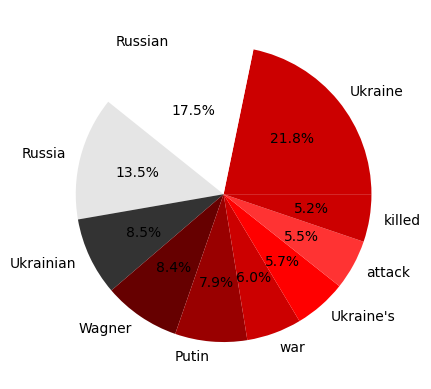

In [101]:
# Get the top 10 words and their counts
top_words = word_counts.most_common(10)

# Separate the words and counts into two lists
words, counts = zip(*top_words)

# Create a pie chart
plt.pie(counts, labels=words, colors=colors, autopct='%1.1f%%')

# Display the pie chart
plt.show()

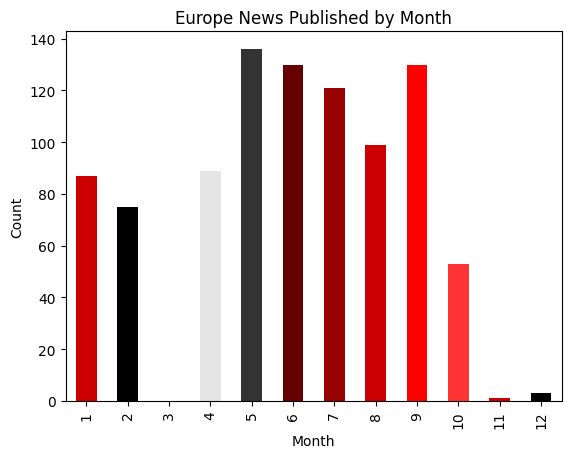

In [103]:
# Define a color palette
colors = ['#CC0000', '#000000', '#FFFFFF', '#E5E5E5', '#333333', '#660000', '#990000', '#CC0000', '#FF0000', '#FF3333']

# Filter the DataFrame for the 'europe' category
df_europe = df[df['category'] == 'europe']

# Using the month column, create a bar plot
df_europe['month'].value_counts().sort_index().plot(kind='bar', color=colors, title='Europe News Published by Month')

# Label the axes and show the plot
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()
